In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
#load the iris dataset from a csv file
df = pd.read_csv('iris.csv')

In [15]:
#drop the species column for clustering purposes
data = df.drop(columns=['species'])

In [16]:
# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [17]:
# Determine the optimum number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

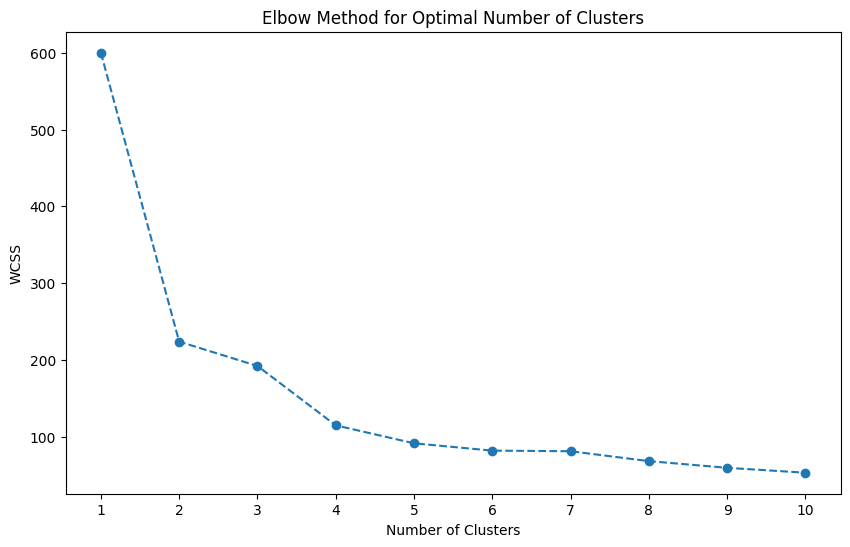

In [31]:
# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [30]:
#from the elbow graph, choose the optimal number of clusters 
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_


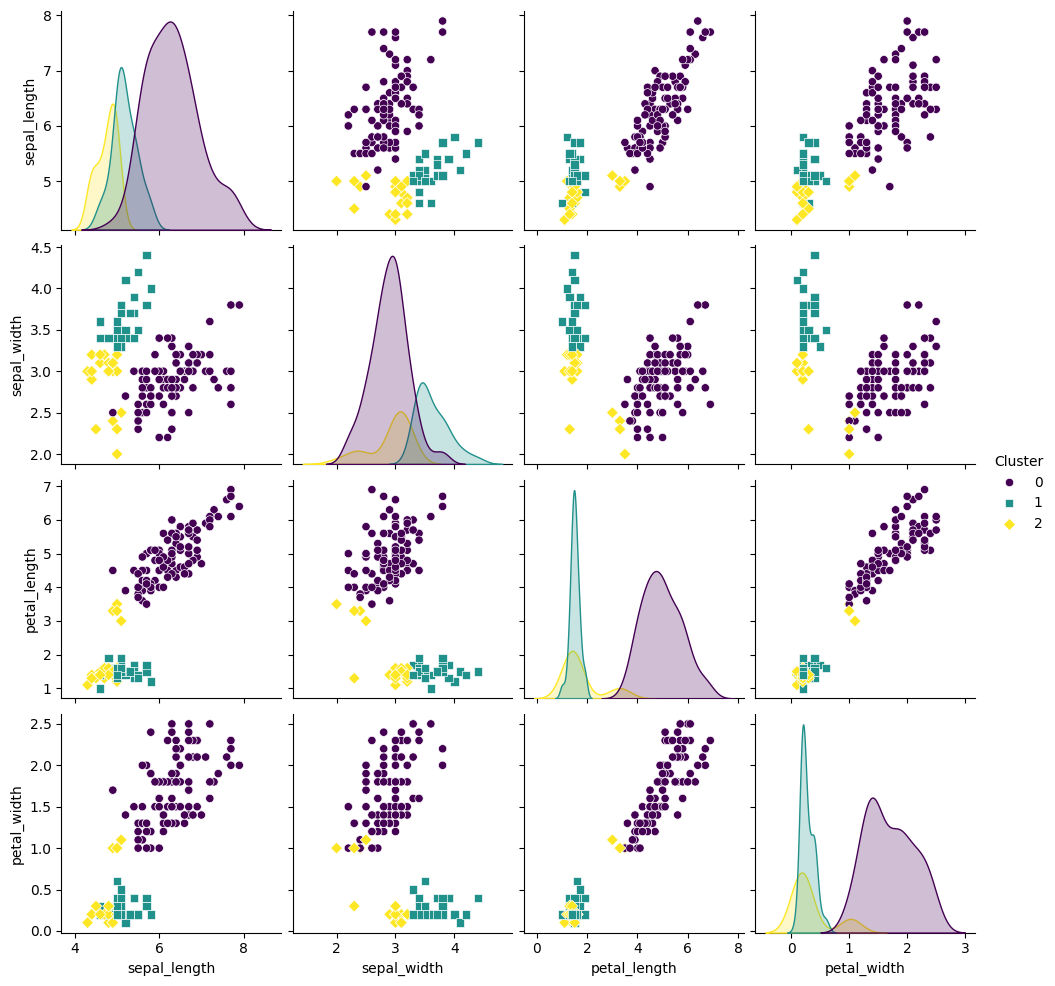

In [28]:
#visualize the clusters using pair plotting
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()